<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [12]:
import numpy as np

theta0_grad = 90
theta0 = np.deg2rad(theta0_grad)
omega0 = 0.5
g = 9.8
L = 1
gamma = 0.1
dt = 0.01
t_max = 10
t_min = 0

def fun(theta, omega, g, L, gamma):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        gamma (float): Constante de amortiguamiento (en 1/s).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta) - gamma * omega
    return np.array([dtheta_dt, domega_dt])


In [15]:
def euler_method(theta0, omega0, g, L, gamma, dt, t_max):
    """
    Simula el péndulo simple usando el método de Euler.

    Args:
        theta0 (float): Ángulo inicial (en radianes).
        omega0 (float): Velocidad angular inicial (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        gamma (float): Constante de amortiguamiento (en 1/s).
        dt (float): Paso de tiempo (en segundos).
        t_max (float): Tiempo máximo de simulación (en segundos).

    Returns:
        tuple: Arrays de tiempos, ángulos y velocidades angulares.
    """
    N = int((t_max - t_min)/ dt) + 1
    t = np.linspace(t_min,t_max,N)
    theta = np.zeros(N)
    omega = np.zeros(N)

    theta[0] = theta0
    omega[0] = omega0

    for i in range(1, N):
        derivs = fun(theta[i-1], omega[i-1], g, L, gamma)
        theta[i] = theta[i-1] + dt * derivs[0]
        omega[i] = omega[i-1] + dt * derivs[1]

    return t, theta, omega


In [3]:
def runge_kutta_method(theta0, omega0, g, L, gamma, dt, t_max):
    """
    Simula el péndulo simple usando el método de Runge-Kutta de cuarto orden.

    Args:
        theta0 (float): Ángulo inicial (en radianes).
        omega0 (float): Velocidad angular inicial (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        gamma (float): Constante de amortiguamiento (en 1/s).
        dt (float): Paso de tiempo (en segundos).
        t_max (float): Tiempo máximo de simulación (en segundos).

    Returns:
        tuple: Arrays de tiempos, ángulos y velocidades angulares.
    """
    N = int((t_max - t_min) / dt) + 1
    t = np.linspace(0, t_max, N)
    theta = np.zeros(N)
    omega = np.zeros(N)

    theta[0] = theta0
    omega[0] = omega0

    for i in range(1, N):
        k1 = fun(theta[i-1], omega[i-1], g, L, gamma)
        k2 = fun(theta[i-1] + 0.5 * dt * k1[0], omega[i-1] + 0.5 * dt * k1[1], g, L, gamma)
        k3 = fun(theta[i-1] + 0.5 * dt * k2[0], omega[i-1] + 0.5 * dt * k2[1], g, L, gamma)
        k4 = fun(theta[i-1] + dt * k3[0], omega[i-1] + dt * k3[1], g, L, gamma)

        theta[i] = theta[i-1] + (dt / 6) * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        omega[i] = omega[i-1] + (dt / 6) * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])

    return t, theta, omega


In [22]:
from scipy.integrate import odeint

def pendulo_ecuaciones(y, t, g, L, gamma):
    theta, omega = y
    dydt = [omega, - (g / L) * np.sin(theta) - gamma * omega]
    return dydt

def solucion_odeint(theta0, omega0, g, L, gamma, t_max, dt):
    t = np.linspace(0, t_max, int(t_max / dt) + 1)
    y0 = [theta0, omega0]
    sol = odeint(pendulo_ecuaciones, y0, t, args=(g, L, gamma))
    return t, sol[:, 0], sol[:, 1]


In [49]:
def calculo_energia(theta, omega, g, L):
    """
    Calcula la energía cinética y potencial del péndulo.

    Args:
        theta (array): Ángulos (en radianes).
        omega (array): Velocidades angulares (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        tuple: Energía cinética, energía potencial, y energía total.
    """
    m = 1  # Suponiendo una masa unitaria para simplicidad
    energia_cinetica = 0.5 * m * (L * omega)**2
    energia_potencial = m * g * L * (1 - np.cos(theta))
    energia_total = energia_cinetica + energia_potencial
    return energia_cinetica, energia_potencial, energia_total


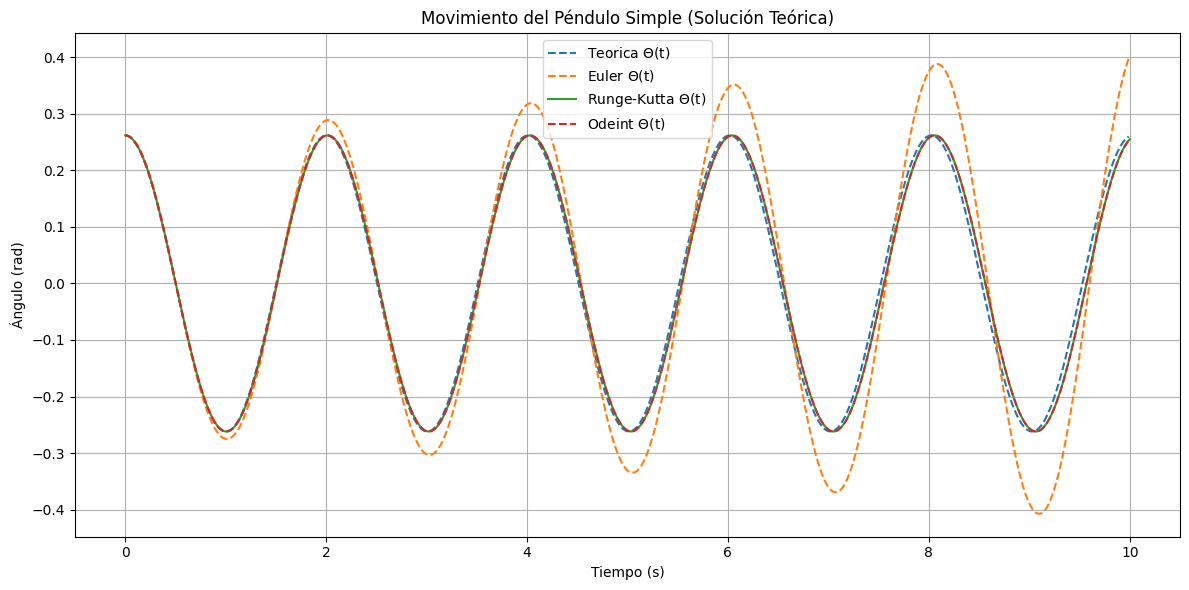

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def solucion_teorica(theta0, omega0, g, L, t_max, dt):
    """
    Calcula la solución teórica para un péndulo simple sin amortiguamiento.

    Args:
        theta0 (float): Ángulo inicial (en radianes).
        omega0 (float): Velocidad angular inicial (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        t_max (float): Tiempo máximo de simulación (en segundos).
        dt (float): Paso de tiempo (en segundos).

    Returns:
        tuple: Arrays de tiempos, ángulos teóricos y velocidades angulares teóricas.
    """
    omega_natural = np.sqrt(g / L)  # Frecuencia angular natural
    t = np.arange(0, t_max, dt)  # Array de tiempos

    # Solución teórica para ángulos pequeños
    theta = theta0 * np.cos(omega_natural * t) + (omega0 / omega_natural) * np.sin(omega_natural * t)
    omega = -theta0 * omega_natural * np.sin(omega_natural * t) + omega0 * np.cos(omega_natural * t)

    return t, theta, omega

# Parámetros del péndulo
g = 9.81  # m/s² (aceleración de la gravedad)
L = 1.0   # m (longitud del péndulo)
theta0 = np.radians(15)  # Ángulo inicial en radianes
omega0 = 0.0  # Velocidad angular inicial
t_max = 10.0  # s (tiempo máximo de simulación)
dt = 0.01  # s (paso de tiempo)

# Calcular la solución teórica
t, theta, omega = solucion_teorica(theta0, omega0, g, L, t_max, dt)
#######################
t1, theta1, omega1 = euler_method(theta0, omega0, g, L, gamma=0, dt=0.01, t_max=10.0)
######################
t2, theta2, omega2 = runge_kutta_method(theta0, omega0, g, L, gamma=0, dt=0.01, t_max=10.0)
######################
t3, theta3, omega3 = solucion_odeint(theta0, omega0, g, L, gamma=0, dt=0.01, t_max=10.0)

# Graficar la solución teórica
plt.figure(figsize=(12, 6))

plt.plot(t, theta, "--", label='Teorica $\Theta$(t)')
plt.plot(t1, theta1, "--", label='Euler $\Theta$(t)')
plt.plot(t2, theta2, label='Runge-Kutta $\Theta$(t)')
plt.plot(t3, theta3, "--", label='Odeint $\Theta$(t)')
plt.title('Movimiento del Péndulo Simple (Solución Teórica)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?

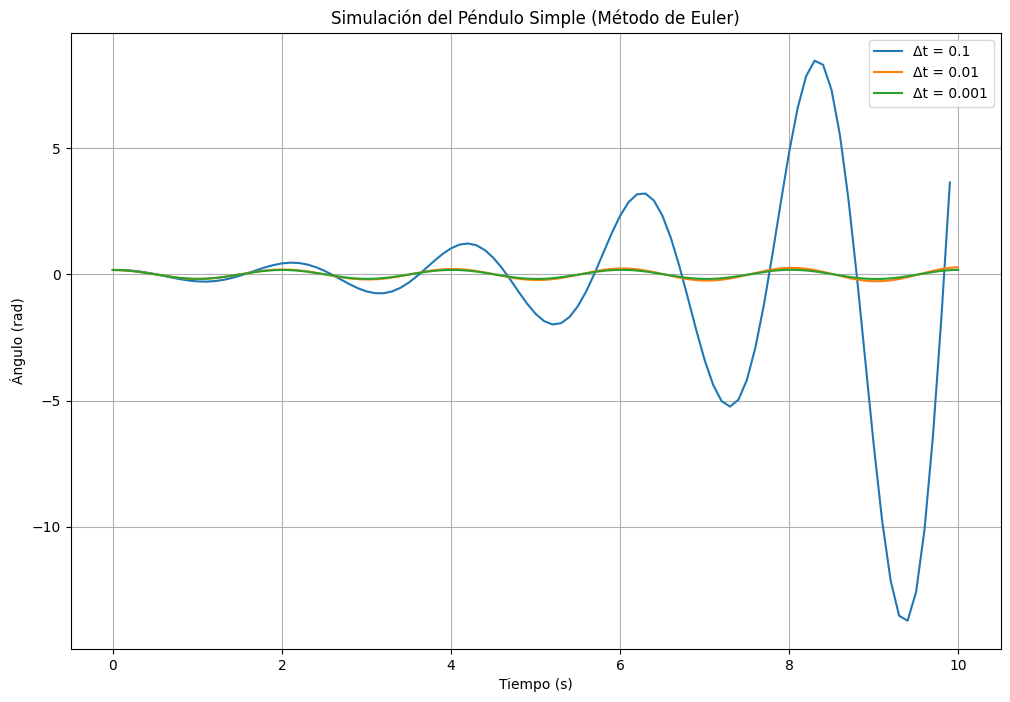

In [37]:

# Parámetros
g = 9.81
L = 1.0
theta0 = np.radians(10)
omega0 = 0.0
t_max = 10.0

# Simular para diferentes valores de Δt
dt_values = [0.1, 0.01, 0.001]

plt.figure(figsize=(12, 8))

for dt in dt_values:
    t, theta, _ = euler_method(theta0, omega0, g, L, t_max, dt)
    plt.plot(t, theta, label=f'Δt = {dt}')

plt.title('Simulación del Péndulo Simple (Método de Euler)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid()
plt.show()


Conclusión: Como se puede observar en la gráfica, un paso de tiempo más pequeño (Δt) proporciona una mejor aproximación a la solución teórica, mientras que un paso más grande puede introducir errores significativos.



2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$

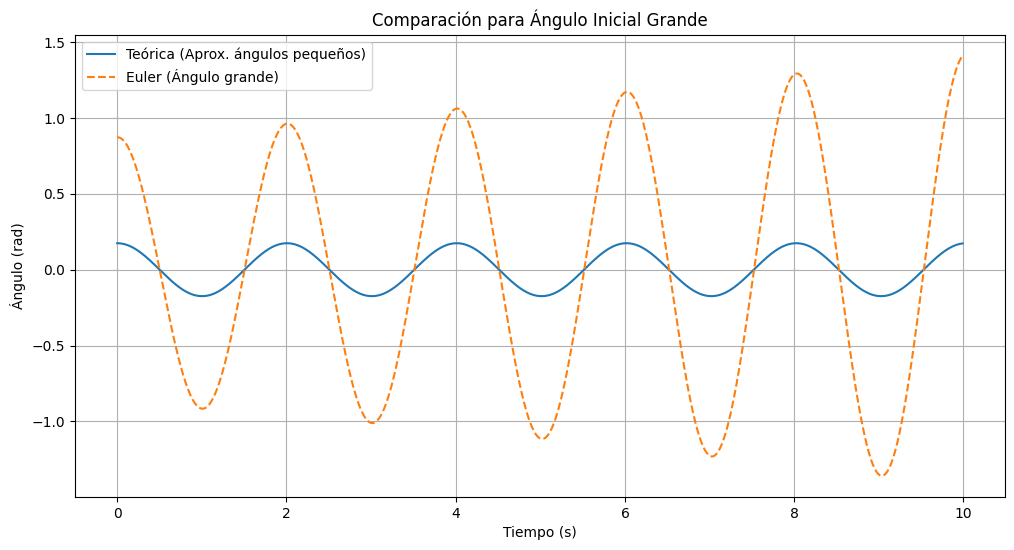

In [42]:
# Parámetros del péndulo con ángulo grande
angulo_grande = np.radians(50)  # Ángulo inicial grande en radianes
angulo_pequeño = np.radians(10)  # Ángulo inicial pequeño en radianes
# Solución teórica para ángulos pequeños (utilizando el código anterior)
t_theory, theta_theory, _ = solucion_teorica(angulo_pequeño, omega0, g, L, t_max, dt_values[1])

# Simulación numérica usando el método de Euler para ángulos grandes
t_euler, theta_euler, _ = euler_method(angulo_grande, omega0, g, L, t_max, dt_values[1])

plt.figure(figsize=(12, 6))
plt.plot(t_theory, theta_theory, label='Teórica (Aprox. ángulos pequeños)')
plt.plot(t_euler, theta_euler, label='Euler (Ángulo grande)', linestyle='dashed')
plt.title('Comparación para Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid()
plt.show()


Conclusión: La gráfica muestra que para ángulos iniciales grandes, la aproximación sinθ≈θ no es válida, y la solución teórica diverge de la solución numérica más precisa.

3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$

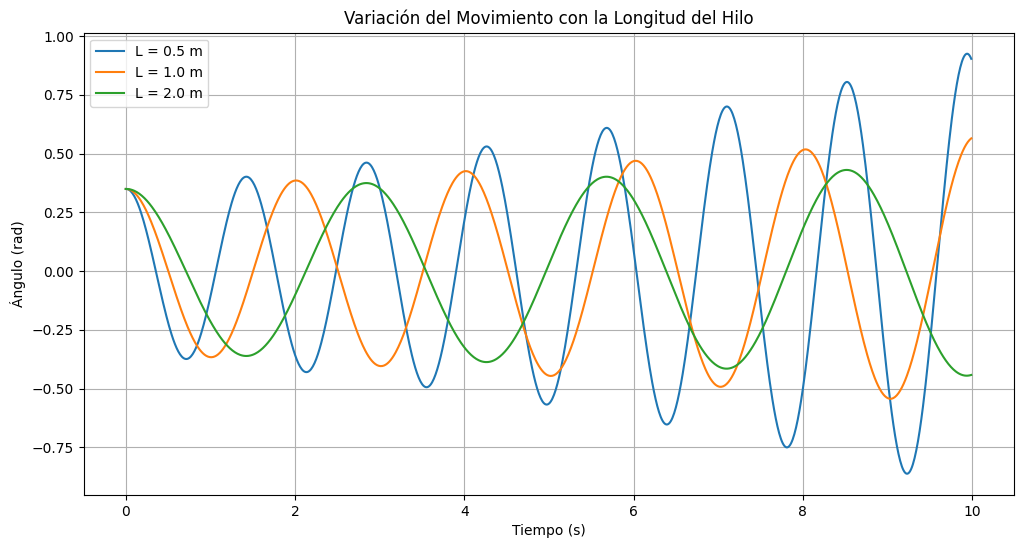

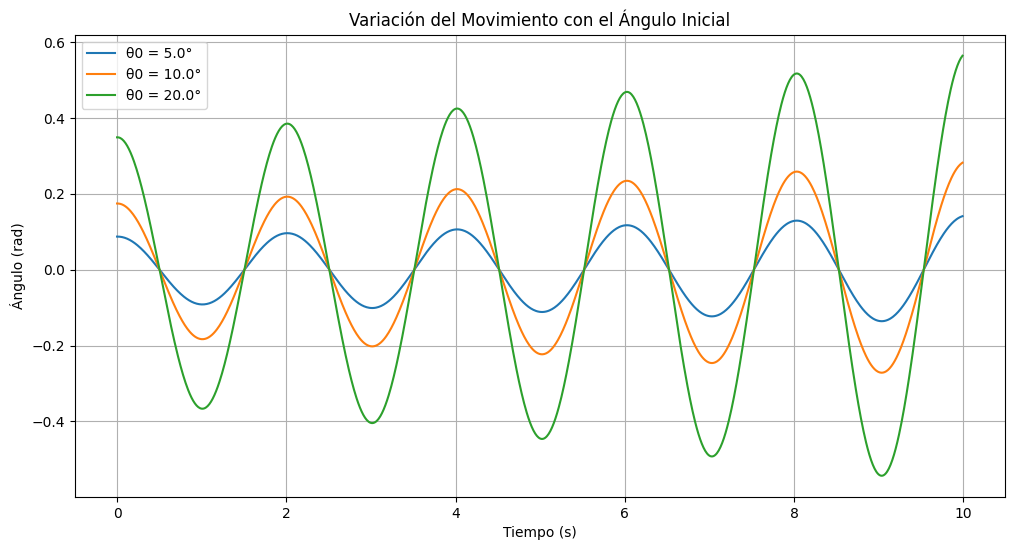

In [46]:
# Simular para diferentes longitudes L
L_values = [0.5, 1.0, 2.0]  # Diferentes longitudes

plt.figure(figsize=(12, 6))

for L in L_values:
    t, theta, _ = euler_method(theta0, omega0, g, L, t_max, dt_values[1])
    plt.plot(t, theta, label=f'L = {L} m')

plt.title('Variación del Movimiento con la Longitud del Hilo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid()
plt.show()

theta0_values = [np.radians(5), np.radians(10), np.radians(20)]  # Diferentes ángulos iniciales

plt.figure(figsize=(12, 6))

for theta0 in theta0_values:
    t, theta, _ = euler_method(theta0, omega0, g, L_values[1], t_max, dt_values[1])
    plt.plot(t, theta, label=f'θ0 = {np.degrees(theta0):.1f}°')

plt.title('Variación del Movimiento con el Ángulo Inicial')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.legend()
plt.grid()
plt.show()


Conclusión: La gráfica muestra cómo el período del péndulo aumenta con la longitud del hilo y cómo la amplitud del movimiento aumenta con un ángulo inicial mayor.

4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?

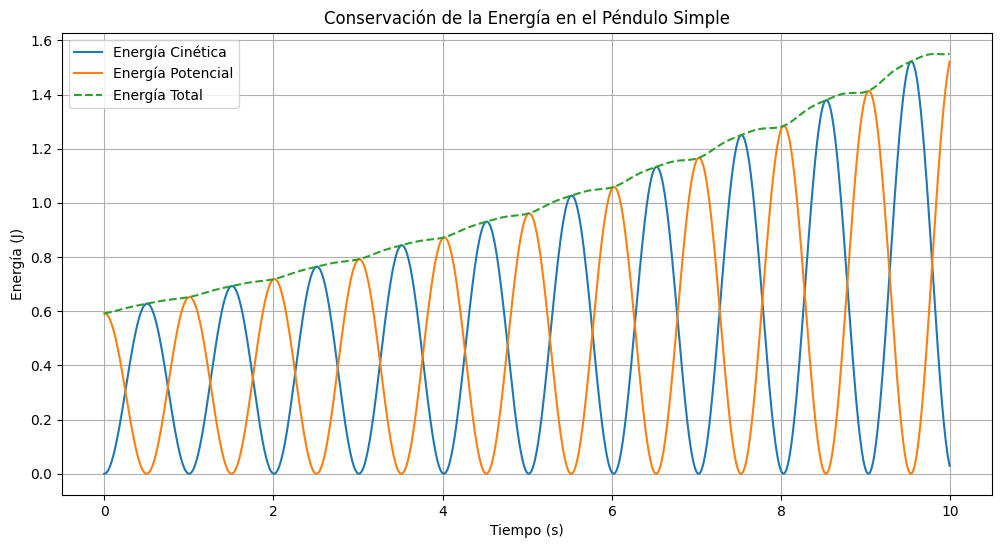

In [47]:
def calculate_energy(theta, omega, m, g, L):
    E_k = 0.5 * m * (L * omega)**2
    E_p = m * g * L * (1 - np.cos(theta))
    E_total = E_k + E_p
    return E_k, E_p, E_total

# Parámetros adicionales
m = 1.0  # kg (masa del péndulo)

# Simular usando Euler para calcular energía
t, theta, omega = euler_method(theta0, omega0, g, L_values[1], t_max, dt_values[1])
E_k, E_p, E_total = calculo_energia(theta, omega, m, g, L_values[1])

plt.figure(figsize=(12, 6))
plt.plot(t, E_k, label='Energía Cinética')
plt.plot(t, E_p, label='Energía Potencial')
plt.plot(t, E_total, label='Energía Total', linestyle='dashed')
plt.title('Conservación de la Energía en el Péndulo Simple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.legend()
plt.grid()
plt.show()


Conclusión: La gráfica de la energía total intenta mostrar una línea casi constante, indicando la conservación de la energía en el sistema ideal.

